<a href="https://colab.research.google.com/github/ejrbdx/Advance-Research-Methods-2024/blob/main/Homework_1_EJR_2_13_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from pathlib import Path
from PIL import Image
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [97]:
class load_data(Dataset):
  def __init__(self,root_dir,csv_path,transform=None):
    print('initialize')
    self.root = Path(root_dir) # where do you have the data?
    self.csv_path = csv_path
    self.transform = transform


    self.df_train = pd.read_csv(os.path.join(self.root,self.csv_path)) # read csv
    self.df = pd.DataFrame(columns = ['image_names','class_label']) # creates dataframe,inputs are the image names and the outputs are the labels-the length of this dataframe is what goes in len

    for fldr in self.root.iterdir(): #look through the directory
      img_names = [] #creates list (i think?)
      if fldr.is_dir(): #if the folder is directory
        img_names = img_names + list(fldr.glob('*.jpg'))

      i = 0
      img_names = [i for i in img_names]
      df_cur = pd.DataFrame(img_names,columns = ['image_names'])
      df_cur['class_label'] = os.path.basename(img_names[i]) #trying to make the label the image name so I can match it with csv img_name
      self.df = pd.concat([self.df, df_cur],axis=0)
      i = i + 1 #trying to make a loop so it doesn't just pick the first img name but goes through the list and puts the list name

      self.df = self.df.sample(frac=1) #shuffle your data
      self.image_names = list(self.df['image_names'].values)
      self.class_label = list(self.df['class_label'].values)
      print(self.df)


  #initialize dataset varables here
  def __len__(self):
    return len(self.image_names)
    #returns the length of the dataset
  def __getitem__(self, idx):


    image = self.image_names[idx]
    image_data = io.imread(image)


    label = self.class_label[idx]

    sample = {'image': image_data, 'label': label}

    if self.transform:
      sample = self.transform(sample)

    return sample

In [40]:
class_ = load_data('/content/drive/MyDrive/Advanced Research Methods/Homework 1/data/localize','classd/train.csv')

initialize
                                           image_names   class_label
308  /content/drive/MyDrive/Advanced Research Metho...  00032549.jpg
618  /content/drive/MyDrive/Advanced Research Metho...  00032549.jpg
727  /content/drive/MyDrive/Advanced Research Metho...  00032549.jpg
645  /content/drive/MyDrive/Advanced Research Metho...  00032549.jpg
225  /content/drive/MyDrive/Advanced Research Metho...  00032549.jpg
..                                                 ...           ...
371  /content/drive/MyDrive/Advanced Research Metho...  00032549.jpg
218  /content/drive/MyDrive/Advanced Research Metho...  00032549.jpg
963  /content/drive/MyDrive/Advanced Research Metho...  00032549.jpg
591  /content/drive/MyDrive/Advanced Research Metho...  00032549.jpg
909  /content/drive/MyDrive/Advanced Research Metho...  00032549.jpg

[996 rows x 2 columns]


In [41]:
class_.root

PosixPath('/content/drive/MyDrive/Advanced Research Methods/Homework 1/data/localize')

In [42]:
for dir in class_.root.iterdir():
  print(dir.name)

classd


0 (480, 720, 3) 00032549.jpg
1 (480, 720, 3) 00032549.jpg
2 (228, 342, 3) 00032549.jpg
3 (480, 720, 3) 00032549.jpg
4 (480, 720, 3) 00032549.jpg
5 (480, 720, 3) 00032549.jpg
6 (480, 720, 3) 00032549.jpg
7 (480, 720, 3) 00032549.jpg


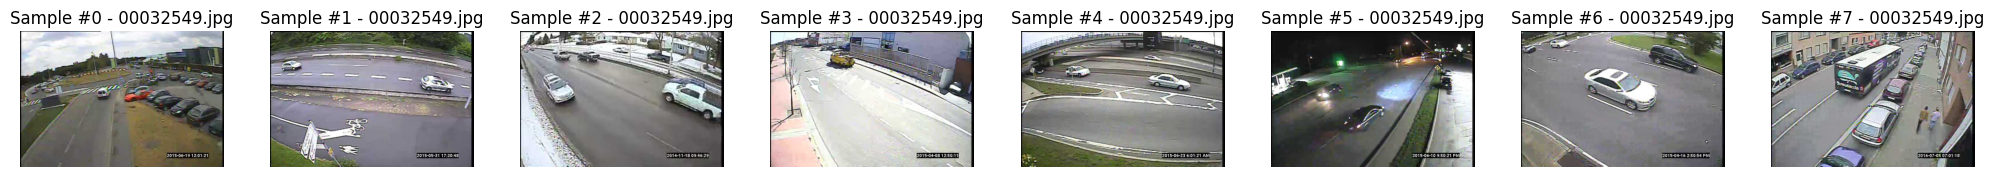

In [43]:
fig = plt.figure(figsize=(20,20))
ncols = 8
for i, sample in enumerate(class_):
  print(i, sample['image'].shape, sample['label'])
  ax = plt.subplot(1, ncols, i + 1)
  plt.tight_layout()
  ax.set_title('Sample #{} - {}'.format(i, sample['label']))
  ax.axis('off')
  # show_landmarks(**sample)
  plt.imshow(sample['image'])

  if i == ncols-1:
      plt.show()
      break

In [44]:
## transform data
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, labels = sample['image'], sample['label']

        h, w = image.shape[:2]

        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        return {'image': img, 'label': labels}

In [45]:
scale = Rescale(600)

In [46]:
out_img = scale(class_[2])

00032549.jpg


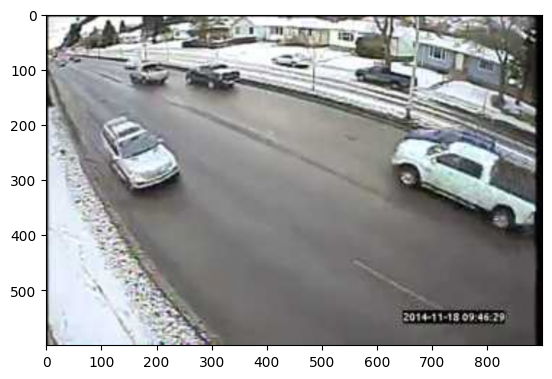

In [47]:
plt.imshow(out_img['image'])
print(out_img['label'])

In [48]:
class Flip(object):
  def __init__(self,direction):
     self.direction = direction

  def __call__(self, sample):
      image, labels = sample['image'], sample['label']

      if self.direction == 0:
       img = np.flip(image,0)
      else:
        img =np.flip(image,1)
      return {'image': img, 'label': labels}

In [49]:
flip_vert = Flip(0)

In [50]:
flip_horz = Flip (1)

In [51]:
vtest = flip_vert(class_[2])

In [52]:
htest = flip_horz(class_[2])

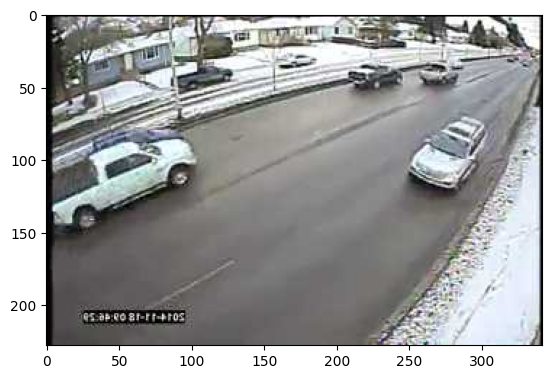

In [53]:
plt.imshow(htest['image'])

In [76]:
print(sample)

{'image': array([[[ 0,  0,  0],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [ 2,  2,  2],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[ 9,  9,  9],
        [12, 12, 12],
        [14, 14, 14],
        ...,
        [ 2,  2,  2],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 1,  1,  1],
        ...,
        [ 1,  1,  1],
        [ 2,  2,  2],
        [ 3,  3,  3]],

       ...,

       [[18, 17, 23],
        [32, 31, 37],
        [52, 51, 57],
        ...,
        [ 0,  0,  4],
        [ 0,  0,  4],
        [ 0,  0,  4]],

       [[18, 17, 23],
        [32, 31, 37],
        [52, 51, 57],
        ...,
        [ 0,  0,  4],
        [ 0,  0,  4],
        [ 0,  0,  4]],

       [[18, 17, 23],
        [32, 31, 37],
        [52, 51, 57],
        ...,
        [ 0,  0,  4],
        [ 0,  0,  4],
        [ 0,  0,  4]]], dtype=uint8), 'label': '00032549.jpg'}


In [77]:
for i,ts in enumerate(traffic_obj):
  print (ts['image'].shape)
  if i == 5:
    break

(256, 384, 3)
(256, 384, 3)
(256, 384, 3)
(256, 384, 3)
(256, 384, 3)
(256, 384, 3)


In [92]:
class ToTensor(object):
  def __call__(self, sample):

    img,lbl =sample['image'],sample['label']


    img_np = img.transpose(2,0,1)
    tensor_from_np = torch.from_numpy(img_np)


    sample = {'image':tensor_from_np, 'label':lbl}
    return sample

In [95]:
compose_transforms = transforms.Compose([Rescale((256)), Flip(0),ToTensor()])
traffic_obj = load_data('/content/drive/MyDrive/Advanced Research Methods/Homework 1/data/localize','classd/train.csv',transform=compose_transforms)

initialize
                                           image_names   class_label
325  /content/drive/MyDrive/Advanced Research Metho...  00032549.jpg
166  /content/drive/MyDrive/Advanced Research Metho...  00032549.jpg
317  /content/drive/MyDrive/Advanced Research Metho...  00032549.jpg
212  /content/drive/MyDrive/Advanced Research Metho...  00032549.jpg
720  /content/drive/MyDrive/Advanced Research Metho...  00032549.jpg
..                                                 ...           ...
178  /content/drive/MyDrive/Advanced Research Metho...  00032549.jpg
654  /content/drive/MyDrive/Advanced Research Metho...  00032549.jpg
830  /content/drive/MyDrive/Advanced Research Metho...  00032549.jpg
348  /content/drive/MyDrive/Advanced Research Metho...  00032549.jpg
117  /content/drive/MyDrive/Advanced Research Metho...  00032549.jpg

[996 rows x 2 columns]
